# Processing Linguistic Training Data

This notebook processes and analyzes the linguistic features data from the training datasets.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import json

# Define data directory
DATA_DIR = Path('data/training_data_linguistic/cochrane_full')

print("Linguistic Data Processing")
print("="*60)
print(f"Data directory: {DATA_DIR}")
print(f"Directory exists: {DATA_DIR.exists()}")

Linguistic Data Processing
Data directory: data/training_data_linguistic/cochrane_full
Directory exists: True


## 2. Load CSV Files and Show Basic Info

In [2]:
# Dictionary to store all dataframes
dataframes = {}

# Define the specific files we want to load
target_files = ['test_linguistic.csv', 'train_linguistic.csv', 'validation_linguistic.csv']

print("\nLoading CSV files...")
print("="*60)

for filename in target_files:
    csv_file = DATA_DIR / filename
    
    if csv_file.exists():
        # Load the CSV
        df = pd.read_csv(csv_file)
        
        # Store in dictionary
        key = csv_file.stem  # filename without extension
        dataframes[key] = df
        
        print(f"\n{csv_file.name}")
        print("-" * 50)
        print(f"  Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
        print(f"  Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Check for missing values
        missing = df.isnull().sum().sum()
        if missing > 0:
            print(f"   Missing values: {missing:,}")
        else:
            print(f"   No missing values")
    else:
        print(f"\n File not found: {filename}")

print(f"\n Loaded {len(dataframes)} dataframes into memory")


Loading CSV files...

test_linguistic.csv
--------------------------------------------------
  Shape: 200 rows × 72 columns
  Memory usage: 0.13 MB
   No missing values

train_linguistic.csv
--------------------------------------------------
  Shape: 15,330 rows × 72 columns
  Memory usage: 10.15 MB
   No missing values

validation_linguistic.csv
--------------------------------------------------
  Shape: 1,702 rows × 72 columns
  Memory usage: 1.13 MB
   No missing values

 Loaded 3 dataframes into memory


## 3. Examine Column Names

In [3]:
dataframes['validation_linguistic'].columns

Index(['file_name', 'dataset', 'pls', 'flesch_reading_ease',
       'flesch_kincaid_grade', 'automated_readability_index',
       'coleman_liau_index', 'gunning_fog_index', 'lix', 'smog_index', 'rix',
       'dale_chall_readability', 'words', 'sentences', 'characters',
       'passive_voice', 'active_voice', 'passive_subjects', 'active_subjects',
       'verbs', 'nouns', 'adjectives', 'adverbs', 'prepositions',
       'auxiliaries', 'conjunctions', 'coord_conjunctions',
       'subordinating_conjunctions', 'determiners', 'interjections', 'numbers',
       'particles', 'pronouns', 'proper_nouns', 'punctuation', 'symbols',
       'other', 'money_entities', 'person_entities', 'norp_entities',
       'facility_entities', 'organization_entities', 'gpe_entities',
       'product_entities', 'event_entities', 'work_of_art_entities',
       'language_entities', 'date_entities', 'time_entities',
       'quantity_entities', 'ordinal_entities', 'cardinal_entities',
       'percent_entities', 'loca

In [4]:
recommended_features = [
      # CRITICAL FEATURES (Explicitly mentioned)
      'words_per_sentence',        # 20-word rule
      'passive_voice',             # Use active voice
      'active_voice',              # Complement
      'sentences_per_paragraph',   # Keep paragraphs short
      'pronouns',                  # Use we/you
      'nominalization',            # Use verbs, not nouns
      'verbs',
      'nouns',
      'numbers',

      # READABILITY (Reading age of 11 years)
       'flesch_reading_ease',
       'flesch_kincaid_grade',
       'automated_readability_index',
       'coleman_liau_index',
       'gunning_fog_index',
       'lix',
       'rix',
       'smog_index',
       'dale_chall_readability',

      # VOCABULARY COMPLEXITY
      'complex_words_dc',          # Difficult words
      'complex_words',
      'long_words',                # Avoid long words
      'syllables_per_word',        # Simplicity
      'polysyllables',

      # SECONDARY INDICATORS
      'tobeverb',                  # Weak verbs
      'auxverb',                   # Verbal complexity
      'subordinating_conjunctions', # Complex sentences


      # BASIC CONTEXT
      'words',                     # Total words
      'sentences',                 # Total sentences
      'paragraphs'                 # Structure
  ]

In [5]:
# Filter dataframes to keep only recommended features and required columns
required_columns = ['file_name', 'dataset', 'pls']
columns_to_keep = recommended_features + required_columns

print("Filtering dataframes to keep only recommended features and required columns...")
print(f"Total columns to keep: {len(columns_to_keep)}")
print(f"Recommended features: {len(recommended_features)}")
print(f"Required columns: {len(required_columns)}")

for name, df in dataframes.items():
    original_cols = len(df.columns)
    
    # Find columns that exist in the dataframe
    existing_columns = [col for col in columns_to_keep if col in df.columns]
    
    # Filter the dataframe
    dataframes[name] = df[existing_columns]
    
    new_cols = len(dataframes[name].columns)
    print(f"{name}: {original_cols} → {new_cols} columns")
    
    # Report any missing columns
    missing_columns = [col for col in columns_to_keep if col not in df.columns]
    if missing_columns:
        print(f"  Missing columns: {missing_columns}")


Filtering dataframes to keep only recommended features and required columns...
Total columns to keep: 32
Recommended features: 29
Required columns: 3
test_linguistic: 72 → 32 columns
train_linguistic: 72 → 32 columns
validation_linguistic: 72 → 32 columns


In [6]:
dataframes['test_linguistic'].head() 

,words_per_sentence,passive_voice,active_voice,sentences_per_paragraph,pronouns,nominalization,verbs,nouns,numbers,flesch_reading_ease,...,polysyllables,tobeverb,auxverb,subordinating_conjunctions,words,sentences,paragraphs,file_name,dataset,pls
0,23.742857,11,73,5.000000,25,44,84,261,81,59.450079,...,153,20,4,12,831,35,7,CD013308.PUB2_abstract.txt,cochrane,0
1,27.555556,21,39,3.857143,15,38,60,266,71,44.574982,...,170,16,3,7,744,27,7,CD009384.PUB3_abstract.txt,cochrane,0
2,22.868421,24,56,5.428571,23,62,80,257,65,50.346913,...,188,24,8,8,869,38,7,CD015253.PUB2_abstract.txt,cochrane,0
3,26.481481,7,66,3.857143,18,38,73,248,40,45.542870,...,147,7,8,7,715,27,7,CD013038.PUB3_abstract.txt,cochrane,0
4,24.750000,18,45,3.333333,17,41,63,311,100,55.753750,...,244,24,6,3,990,40,12,CD014818.PUB2_abstract.txt,cochrane,0


In [7]:
dataframes['train_linguistic'].head()

,words_per_sentence,passive_voice,active_voice,sentences_per_paragraph,pronouns,nominalization,verbs,nouns,numbers,flesch_reading_ease,...,polysyllables,tobeverb,auxverb,subordinating_conjunctions,words,sentences,paragraphs,file_name,dataset,pls
0,25.562500,13,18,2.285714,8,28,31,135,16,29.064124,...,112,11,2,4,409,16,7,CD002215_abstract_full.txt,cochrane,0
1,23.615385,11,17,1.857143,5,9,28,92,15,43.702518,...,72,9,2,3,307,13,7,CD004643.PUB3_abstract_full.txt,cochrane,0
2,19.363636,11,29,3.142857,6,12,40,125,29,47.769641,...,96,6,1,1,426,22,7,CD004112.PUB4_abstract_full.txt,cochrane,0
3,19.000000,22,13,2.750000,5,18,35,142,11,21.790670,...,126,17,1,2,418,22,8,CD006520.PUB2_abstract_full.txt,cochrane,0
4,17.347826,18,22,3.285714,3,16,40,128,27,35.081092,...,115,14,3,2,399,23,7,CD003570_abstract_full.txt,cochrane,0


In [8]:
dataframes['train_linguistic'].describe()

,words_per_sentence,passive_voice,active_voice,sentences_per_paragraph,pronouns,nominalization,verbs,nouns,numbers,flesch_reading_ease,...,long_words,syllables_per_word,polysyllables,tobeverb,auxverb,subordinating_conjunctions,words,sentences,paragraphs,pls
count,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,...,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000,15330.000000
mean,23.456346,17.182257,33.323679,7.112788,14.612264,21.280691,50.505936,158.073842,28.656751,39.125354,...,169.192172,1.700963,120.739074,15.583170,3.642661,5.623940,513.874103,21.913242,4.457469,0.500000
std,4.106816,9.091925,16.805313,6.662745,9.420253,14.093185,23.017308,80.930113,30.911683,11.248515,...,82.360431,0.132696,62.368956,7.632281,3.160467,4.167235,250.590731,9.959421,2.595414,0.500016
min,11.600000,0.000000,-1.000000,1.142857,0.000000,0.000000,4.000000,21.000000,0.000000,-26.649571,...,13.000000,1.055623,5.000000,0.000000,0.000000,0.000000,101.000000,3.000000,1.000000,0.000000
25%,20.650000,11.000000,21.000000,3.285714,8.000000,11.000000,34.000000,99.000000,7.000000,31.991467,...,109.000000,1.613218,74.000000,10.000000,1.000000,3.000000,336.000000,15.000000,2.000000,0.000000
50%,23.055556,16.000000,31.000000,4.857143,13.000000,18.000000,48.000000,142.000000,17.000000,39.345458,...,158.000000,1.699617,112.000000,15.000000,3.000000,5.000000,463.000000,21.000000,5.000000,0.500000
75%,25.863636,23.000000,44.000000,8.000000,20.000000,29.000000,66.000000,211.000000,42.000000,46.562728,...,223.750000,1.785104,161.000000,20.000000,5.000000,8.000000,694.000000,29.000000,7.000000,1.000000
max,53.800000,102.000000,132.000000,69.000000,89.000000,97.000000,191.000000,699.000000,281.000000,80.630817,...,644.000000,2.409524,542.000000,66.000000,40.000000,37.000000,2452.000000,78.000000,12.000000,1.000000


In [9]:
# Find the text with minimum value in the 'tobeverb' column
print("Finding text with minimum value in 'tobeverb' column...")
print("="*60)

min_tobeverb_value = float('inf')
min_file_info = None

for name, df in dataframes.items():
    if 'tobeverb' in df.columns and 'file_name' in df.columns:
        # Find the minimum value in this dataset
        dataset_min = df['tobeverb'].min()
        
        if dataset_min < min_tobeverb_value:
            min_tobeverb_value = dataset_min
            # Get the row with minimum tobeverb value
            min_row = df[df['tobeverb'] == dataset_min].iloc[0]
            min_file_info = {
                'dataset': name,
                'file_name': min_row['file_name'],
                'tobeverb_value': dataset_min
            }

if min_file_info:
    print(f"\nMinimum 'tobeverb' value found:")
    print(f"  Dataset: {min_file_info['dataset']}")
    print(f"  File name: {min_file_info['file_name']}")
    print(f"  tobeverb value: {min_file_info['tobeverb_value']}")
    
    # Read and print the text from the corresponding file
    import os
    file_path = f"data/training_data/cochrane/train/abstract/{min_file_info['file_name']}"
    
    if os.path.exists(file_path):
        print(f"\nReading text from: {file_path}")
        print("-" * 60)
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                text_content = file.read()
                print(text_content)
        except Exception as e:
            print(f"Error reading file: {e}")
    else:
        print(f"\nFile not found: {file_path}")
else:
    print("\nNo 'tobeverb' column found in any dataset or no data available.")


Finding text with minimum value in 'tobeverb' column...

Minimum 'tobeverb' value found:
  Dataset: train_linguistic
  File name: CD012273.PUB2_abstract_full.txt
  tobeverb value: 0

Reading text from: data/training_data/cochrane/train/abstract/CD012273.PUB2_abstract_full.txt
------------------------------------------------------------
Background
Branched‐chain amino acids (BCAAs) play a vital role in neonatal nutrition. Optimal BCAA supplementation might improve neonatal nutrient storage, leading to better physical and neurological development and other outcomes.

Objectives
To determine the effect of BCAA supplementation on physical growth and neurological development in term and preterm neonates. We planned to make the following comparisons: parenteral nutrition with and without BCAA supplementation; enteral BCAA supplementation versus no supplementation; and any type of supplementation including enteral, parenteral and both ways versus no supplementation.
To investigate the supplem

In [10]:
dataframes['validation_linguistic'].head()

,words_per_sentence,passive_voice,active_voice,sentences_per_paragraph,pronouns,nominalization,verbs,nouns,numbers,flesch_reading_ease,...,polysyllables,tobeverb,auxverb,subordinating_conjunctions,words,sentences,paragraphs,file_name,dataset,pls
0,25.800000,17,55,5.714286,24,35,72,347,147,62.601488,...,197,18,10,9,1032,40,7,CD013303.PUB2_abstract_full.txt,cochrane,0
1,27.740741,29,43,3.857143,13,32,72,248,27,43.589230,...,133,25,3,0,749,27,7,CD011334.PUB3_abstract_full.txt,cochrane,0
2,22.695652,25,49,6.571429,22,60,74,289,105,54.143741,...,228,36,12,7,1044,46,7,CD013332.PUB2_abstract_full.txt,cochrane,0
3,29.588235,24,64,4.857143,29,40,88,337,102,31.990615,...,278,10,3,6,1006,34,7,CD006689.PUB3_abstract_full.txt,cochrane,0
4,24.666667,25,35,3.857143,17,38,60,212,51,44.863198,...,159,11,5,6,666,27,7,CD006119.PUB4_abstract_full.txt,cochrane,0


In [11]:
dataframes['validation_linguistic'].describe()

,words_per_sentence,passive_voice,active_voice,sentences_per_paragraph,pronouns,nominalization,verbs,nouns,numbers,flesch_reading_ease,...,long_words,syllables_per_word,polysyllables,tobeverb,auxverb,subordinating_conjunctions,words,sentences,paragraphs,pls
count,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,...,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000
mean,22.695809,21.493537,51.678613,8.214827,26.551704,32.298472,73.172150,227.277321,44.807873,45.859956,...,232.647474,1.630482,163.877203,20.812573,6.460047,8.816686,742.827262,33.004113,6.554054,0.500000
std,4.360260,8.505399,18.133109,9.952264,12.204194,15.741675,22.004096,75.599315,41.159875,10.299373,...,74.356651,0.121423,59.976320,7.879427,4.267150,5.416178,218.996269,8.950414,2.738079,0.500147
min,13.090909,2.000000,3.000000,1.714286,0.000000,0.000000,7.000000,25.000000,0.000000,3.475475,...,27.000000,1.093866,17.000000,2.000000,0.000000,0.000000,104.000000,5.000000,1.000000,0.000000
25%,19.455492,16.000000,40.000000,3.800000,18.000000,20.000000,59.000000,173.000000,12.000000,39.243356,...,177.000000,1.551783,117.000000,15.000000,3.000000,5.000000,597.000000,27.000000,7.000000,0.000000
50%,22.163978,21.000000,50.000000,4.714286,25.000000,30.000000,73.000000,228.500000,28.000000,46.401028,...,236.000000,1.626375,162.000000,20.000000,6.000000,8.000000,767.000000,34.000000,7.000000,0.500000
75%,25.341945,27.000000,63.000000,5.857143,35.000000,42.000000,88.000000,288.000000,71.000000,52.983306,...,289.000000,1.710132,210.000000,26.000000,9.000000,12.000000,907.000000,39.000000,8.000000,1.000000
max,44.520000,70.000000,158.000000,52.000000,69.000000,100.000000,184.000000,485.000000,232.000000,79.063599,...,429.000000,2.078341,342.000000,53.000000,29.000000,35.000000,1481.000000,68.000000,12.000000,1.000000


In [12]:
dataframes['validation_linguistic'].columns

Index(['words_per_sentence', 'passive_voice', 'active_voice',
       'sentences_per_paragraph', 'pronouns', 'nominalization', 'verbs',
       'nouns', 'numbers', 'flesch_reading_ease', 'flesch_kincaid_grade',
       'automated_readability_index', 'coleman_liau_index',
       'gunning_fog_index', 'lix', 'rix', 'smog_index',
       'dale_chall_readability', 'complex_words_dc', 'complex_words',
       'long_words', 'syllables_per_word', 'polysyllables', 'tobeverb',
       'auxverb', 'subordinating_conjunctions', 'words', 'sentences',
       'paragraphs', 'file_name', 'dataset', 'pls'],
      dtype='object')

In [13]:
# Filter rows with less than 150 words
for split_name in ['train_linguistic', 'validation_linguistic']:
    if split_name in dataframes:
        dataframes[split_name] = dataframes[split_name][dataframes[split_name]['words'] >= 150].copy()

In [14]:
# Get how many rows are in each split. And how many abstracts are in each split, and how many pls are in each split.

for split_name in ['train_linguistic', 'validation_linguistic']:
    if split_name in dataframes:
        df = dataframes[split_name]
        split_type = split_name.split('_')[0].capitalize()
        
        print(f"\n{split_type} Split:")
        print("-" * 30)
        print(f"Total rows: {len(df)}")
        
        if 'pls' in df.columns:
            pls_count = len(df[df['pls'] == True])
            abstract_count = len(df[df['pls'] == False])
            print(f"PLS articles: {pls_count}")
            print(f"Abstracts: {abstract_count}")
            
            # Calculate and print percentages
            total_count = len(df)
            if total_count > 0:
                pls_percentage = (pls_count / total_count) * 100
                abstract_percentage = (abstract_count / total_count) * 100
                print(f"PLS percentage: {pls_percentage:.2f}%")
                print(f"Abstract percentage: {abstract_percentage:.2f}%")
        else:
            print("No 'pls' column found")



Train Split:
------------------------------
Total rows: 14419
PLS articles: 6754
Abstracts: 7665
PLS percentage: 46.84%
Abstract percentage: 53.16%

Validation Split:
------------------------------
Total rows: 1689
PLS articles: 838
Abstracts: 851
PLS percentage: 49.62%
Abstract percentage: 50.38%


## 4. Analyzing Percentiles

In [15]:
# Analyze percentiles for recommended_features columns by PLS and Abstract separately
import numpy as np

print("Percentile Analysis for Recommended Features")
print("="*60)


for split_name in ['train_linguistic', 'validation_linguistic']:
    if split_name in dataframes:
        df = dataframes[split_name]
        split_type = split_name.split('_')[0].capitalize()
        
        print(f"\n{split_type} Split:")
        print("-" * 30)
        
        # Analyze each recommended feature side by side
        if 'pls' in df.columns:
            pls_df = df[df['pls'] == True]
            abstract_df = df[df['pls'] == False]
            
            for col in recommended_features:
                if col in df.columns and len(df[col].dropna()) > 0:
                    print(f"\n{col}:")
                    print(f"{'':15} {'PLS':>15} {'Abstracts':>15}")
                    print("-" * 50)
                    
                    percentiles = [10, 25, 50, 75, 90, 95, 99]
                    
                    # Calculate percentiles for both subsets
                    pls_values = np.percentile(pls_df[col].dropna(), percentiles) if len(pls_df[col].dropna()) > 0 else [np.nan] * len(percentiles)
                    abstract_values = np.percentile(abstract_df[col].dropna(), percentiles) if len(abstract_df[col].dropna()) > 0 else [np.nan] * len(percentiles)
                    
                    # Print side by side
                    for p, pls_v, abs_v in zip(percentiles, pls_values, abstract_values):
                        print(f"  {p:2d}th percentile: {pls_v:12.2f} {abs_v:15.2f}")


Percentile Analysis for Recommended Features

Train Split:
------------------------------

words_per_sentence:
                            PLS       Abstracts
--------------------------------------------------
  10th percentile:        17.97           19.84
  25th percentile:        19.81           21.73
  50th percentile:        22.13           24.07
  75th percentile:        24.76           26.71
  90th percentile:        27.60           29.49
  95th percentile:        29.69           31.31
  99th percentile:        34.34           35.76

passive_voice:
                            PLS       Abstracts
--------------------------------------------------
  10th percentile:         6.00           12.00
  25th percentile:         9.00           15.00
  50th percentile:        13.00           20.00
  75th percentile:        18.00           26.00
  90th percentile:        23.00           33.00
  95th percentile:        27.00           37.00
  99th percentile:        35.00           46.00

ac

## 5. Analyzing Distributions

Distribution Analysis for Recommended Features


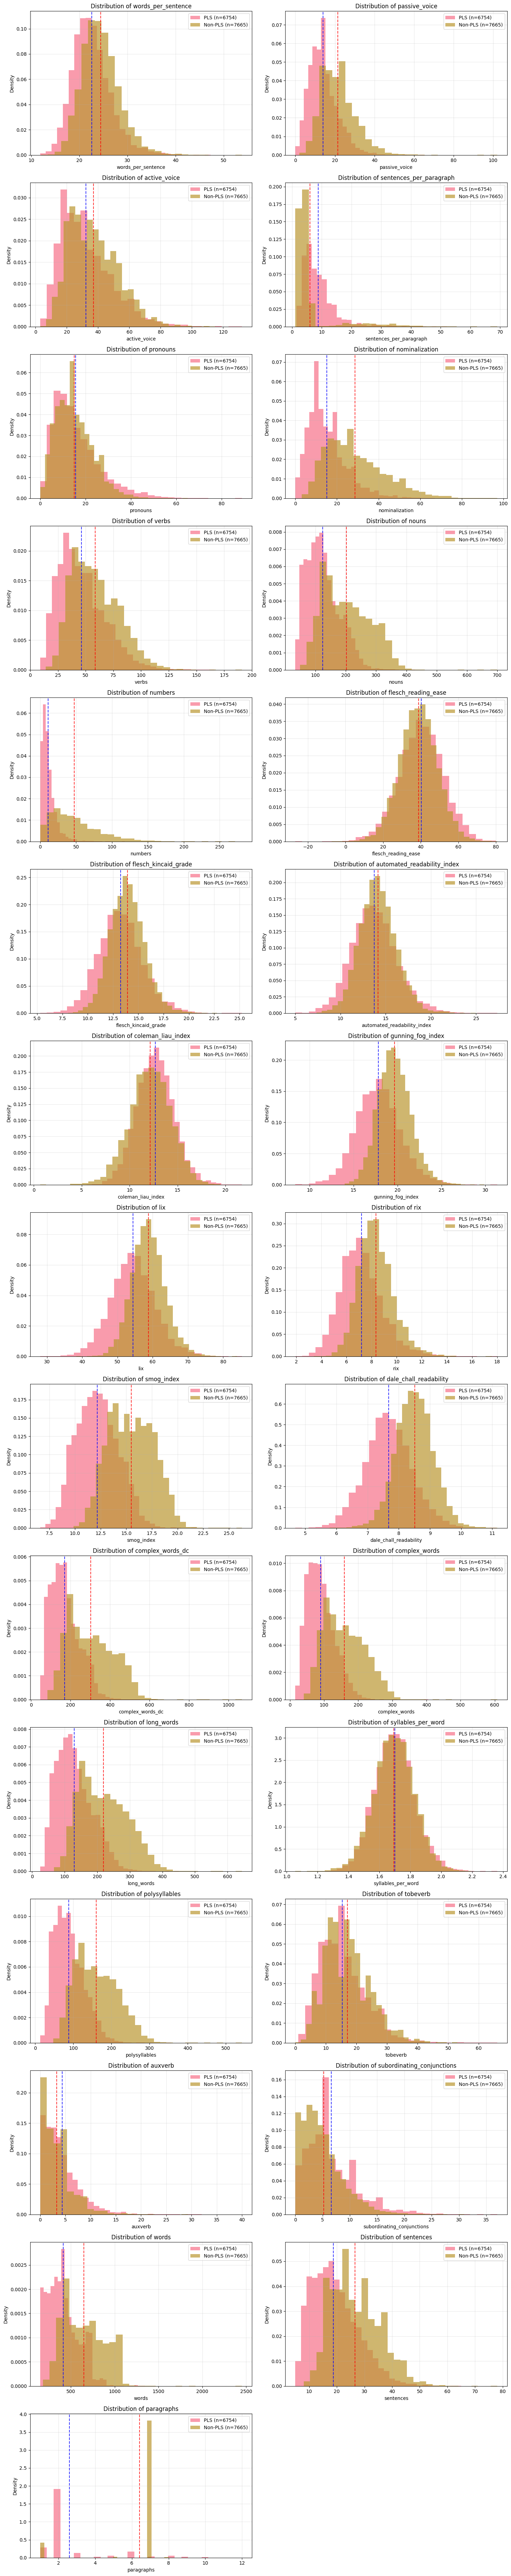


Summary Statistics by PLS Status:
--------------------------------------------------

words_per_sentence:
  PLS     - Mean:    22.54, Std:     3.97, Median:    22.13
  Non-PLS - Mean:    24.43, Std:     3.91, Median:    24.07
  Cohen's d:    -0.48

passive_voice:
  PLS     - Mean:    13.95, Std:     7.07, Median:    13.00
  Non-PLS - Mean:    21.51, Std:     8.60, Median:    20.00
  Cohen's d:    -0.95

active_voice:
  PLS     - Mean:    32.18, Std:    16.54, Median:    29.00
  Non-PLS - Mean:    37.13, Std:    15.52, Median:    35.00
  Cohen's d:    -0.31

sentences_per_paragraph:
  PLS     - Mean:     8.83, Std:     5.49, Median:     7.50
  Non-PLS - Mean:     6.06, Std:     7.52, Median:     3.86
  Cohen's d:     0.42

pronouns:
  PLS     - Mean:    15.60, Std:    10.49, Median:    13.00
  Non-PLS - Mean:    15.06, Std:     8.01, Median:    14.00
  Cohen's d:     0.06

nominalization:
  PLS     - Mean:    15.07, Std:     9.18, Median:    13.00
  Non-PLS - Mean:    28.73, Std:    14

In [16]:
# Plot distributions for recommended features, separating PLS from non-PLS
import matplotlib.pyplot as plt
import seaborn as sns

print("Distribution Analysis for Recommended Features")
print("="*60)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for each recommended feature
n_features = len(recommended_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()

# Use training data for distribution analysis
if 'train_linguistic' in dataframes:
    df = dataframes['train_linguistic']
    
    for i, col in enumerate(recommended_features):
        if col in df.columns and len(df[col].dropna()) > 0:
            ax = axes[i]
            
            # Separate data by PLS status
            pls_data = df[df['pls'] == True][col].dropna()
            non_pls_data = df[df['pls'] == False][col].dropna()
            
            # Plot histograms
            ax.hist(pls_data, alpha=0.7, label=f'PLS (n={len(pls_data)})', bins=30, density=True)
            ax.hist(non_pls_data, alpha=0.7, label=f'Non-PLS (n={len(non_pls_data)})', bins=30, density=True)
            
            ax.set_title(f'Distribution of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Density')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
            # Add some statistics
            pls_mean = pls_data.mean() if len(pls_data) > 0 else 0
            non_pls_mean = non_pls_data.mean() if len(non_pls_data) > 0 else 0
            ax.axvline(pls_mean, color='blue', linestyle='--', alpha=0.8, label=f'PLS mean: {pls_mean:.2f}')
            ax.axvline(non_pls_mean, color='red', linestyle='--', alpha=0.8, label=f'Non-PLS mean: {non_pls_mean:.2f}')

# Hide any unused subplots
for i in range(len(recommended_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics by PLS Status:")
print("-" * 50)

for col in recommended_features:
    if col in df.columns and len(df[col].dropna()) > 0:
        pls_data = df[df['pls'] == True][col].dropna()
        non_pls_data = df[df['pls'] == False][col].dropna()
        
        print(f"\n{col}:")
        print(f"  PLS     - Mean: {pls_data.mean():8.2f}, Std: {pls_data.std():8.2f}, Median: {pls_data.median():8.2f}")
        print(f"  Non-PLS - Mean: {non_pls_data.mean():8.2f}, Std: {non_pls_data.std():8.2f}, Median: {non_pls_data.median():8.2f}")
        
        # Calculate effect size (Cohen's d)
        if len(pls_data) > 0 and len(non_pls_data) > 0:
            pooled_std = np.sqrt(((len(pls_data) - 1) * pls_data.var() + (len(non_pls_data) - 1) * non_pls_data.var()) / (len(pls_data) + len(non_pls_data) - 2))
            cohens_d = (pls_data.mean() - non_pls_data.mean()) / pooled_std
            print(f"  Cohen's d: {cohens_d:8.2f}")


## 6. Calculating Thresholds.

In [17]:
ESSENTIAL_FEATURES = {
      # Readability indices (9) - ALL
      'flesch_reading_ease': 'higher_better',
      'flesch_kincaid_grade': 'lower_better',
      'gunning_fog_index': 'lower_better',
      'smog_index': 'lower_better',
      'dale_chall_readability': 'lower_better',
      'coleman_liau_index': 'lower_better',
      'automated_readability_index': 'lower_better',
      'lix': 'lower_better',
      'rix': 'lower_better',

      # Structural complexity (4)
      'words_per_sentence': 'lower_better',
      'passive_voice': 'lower_better',
      'active_voice': 'higher_better',
      'nominalization': 'lower_better',

      # Vocabulary complexity (2)
      'complex_words_dc': 'lower_better',  # Keep this over complex_words
      'long_words': 'lower_better',
      'complex_words': 'lower_better',

      # Content density (2) - NEW
      'pronouns': 'higher_better',  # Fewer numbers = more accessible
      'nouns': 'lower_better',    # Fewer nouns = less dense

      # Base metric (1)
      'words': None  # Max 850 words
  }

In [22]:
# Create evaluation thresholds based on Cochrane percentiles from training data
print("Creating PLS Evaluation Thresholds from Training Data")
print("="*80)

# Get training dataframe and separate by PLS status
df_train = dataframes['train_linguistic']
pls_df = df_train[df_train['pls'] == True]
abstract_df = df_train[df_train['pls'] == False]

print(f"Training data breakdown:")
print(f"  Total samples: {len(df_train)}")
print(f"  PLS samples: {len(pls_df)}")
print(f"  Abstract samples: {len(abstract_df)}")
print(f"\nNOTE: All thresholds are calculated ONLY from PLS texts (not abstracts)")
print("="*80)

# Initialize thresholds dictionary
thresholds = {}

# Process each essential feature
for feature, direction in ESSENTIAL_FEATURES.items():
    if feature == 'words' or feature not in df_train.columns:
        continue
    
    # Calculate percentiles ONLY for PLS texts (this is our gold standard)
    pls_values = pls_df[feature].dropna()
    pls_percentiles = {
        'p10': np.percentile(pls_values, 10),
        'p25': np.percentile(pls_values, 25),
        'p50': np.percentile(pls_values, 50),
        'p75': np.percentile(pls_values, 75),
        'p90': np.percentile(pls_values, 90)
    }
    
    # Calculate percentiles for Abstract texts (for reference only)
    abstract_values = abstract_df[feature].dropna()
    abstract_percentiles = {
        'p50': np.percentile(abstract_values, 50)
    }
    
    # Set thresholds based on direction (ALL based on PLS percentiles)
    if direction == 'higher_better':
        thresholds[feature] = {
            'direction': direction,
            'excellent': pls_percentiles['p75'],  # Top 25% of PLS texts
            'good': pls_percentiles['p50'],       # Median of PLS texts
            'acceptable': pls_percentiles['p25'], # Bottom quartile of PLS texts
            'poor': pls_percentiles['p10'],       # Bottom 10% of PLS texts
            'pls_median': pls_percentiles['p50'],
            'abstract_median': abstract_percentiles['p50']
        }
    elif direction == 'lower_better':
        thresholds[feature] = {
            'direction': direction,
            'excellent': pls_percentiles['p25'],  # Top 25% of PLS texts (lower is better)
            'good': pls_percentiles['p50'],       # Median of PLS texts
            'acceptable': pls_percentiles['p75'], # Bottom quartile of PLS texts
            'poor': pls_percentiles['p90'],       # Bottom 10% of PLS texts
            'pls_median': pls_percentiles['p50'],
            'abstract_median': abstract_percentiles['p50']
        }

# Display thresholds summary
print("\nTHRESHOLD SUMMARY (BASED ONLY ON PLS TEXTS)")
print("="*80)

for feature, config in thresholds.items():
    direction_symbol = "↑" if config['direction'] == 'higher_better' else "↓"
    print(f"\n{feature} {direction_symbol}")
    print(f"  Source: PLS texts only (n={len(pls_df[feature].dropna())})")
    
    if config['direction'] == 'higher_better':
        print(f"  Excellent:  > {config['excellent']:.2f} (P75 of PLS)")
        print(f"  Good:       > {config['good']:.2f} (P50 of PLS)")
        print(f"  Acceptable: > {config['acceptable']:.2f} (P25 of PLS)")
        print(f"  Poor:       < {config['poor']:.2f} (P10 of PLS)")
    else:
        print(f"  Excellent:  < {config['excellent']:.2f} (P25 of PLS)")
        print(f"  Good:       < {config['good']:.2f} (P50 of PLS)")
        print(f"  Acceptable: < {config['acceptable']:.2f} (P75 of PLS)")
        print(f"  Poor:       > {config['poor']:.2f} (P90 of PLS)")
    
    print(f"  Reference - PLS median: {config['pls_median']:.2f}, Abstract median: {config['abstract_median']:.2f}")

# Save thresholds to JSON
import json
output_path = Path('data/pls_evaluation_thresholds_from_data.json')
with open(output_path, 'w') as f:
    # Convert numpy types to Python native types for JSON serialization
    thresholds_serializable = {}
    for k, v in thresholds.items():
        thresholds_serializable[k] = {
            key: float(val) if isinstance(val, (np.floating, np.integer)) else val
            for key, val in v.items()
        }
    json.dump(thresholds_serializable, f, indent=2)

print(f"\n Thresholds saved to: {output_path}")
print(f"NOTE: All thresholds are derived exclusively from PLS text percentiles")

# Example evaluation function
def evaluate_text_simple(features, thresholds):
    """Simple evaluation against thresholds"""
    score = 0
    total_features = 0
    issues = []
    
    for feature, config in thresholds.items():
        if feature not in features:
            continue
            
        value = features[feature]
        total_features += 1
        
        if config['direction'] == 'higher_better':
            if value >= config['excellent']:
                score += 100
            elif value >= config['good']:
                score += 75
            elif value >= config['acceptable']:
                score += 50
            else:
                score += 25
                issues.append(f"{feature}: {value:.1f} (target > {config['good']:.1f})")
        else:  # lower_better
            if value <= config['excellent']:
                score += 100
            elif value <= config['good']:
                score += 75
            elif value <= config['acceptable']:
                score += 50
            else:
                score += 25
                issues.append(f"{feature}: {value:.1f} (target < {config['good']:.1f})")
    
    final_score = score / total_features if total_features > 0 else 0
    
    return {
        'score': final_score,
        'rating': 'Excellent' if final_score >= 85 else 'Good' if final_score >= 70 else 'Acceptable' if final_score >= 50 else 'Poor',
        'issues': issues[:5]  # Top 5 issues
    }

# Test with a sample
print("\n" + "="*80)
print("EXAMPLE EVALUATION")
print("="*80)

# Get a random PLS text for testing
sample_pls = pls_df.sample(1).iloc[0]
sample_features = {col: sample_pls[col] for col in ESSENTIAL_FEATURES.keys() if col in sample_pls.index}

result = evaluate_text_simple(sample_features, thresholds)
print(f"\nSample PLS text evaluation:")
print(f"  Score: {result['score']:.1f}/100")
print(f"  Rating: {result['rating']}")
if result['issues']:
    print(f"  Issues to address:")
    for issue in result['issues']:
        print(f"    - {issue}")


Creating PLS Evaluation Thresholds from Training Data
Training data breakdown:
  Total samples: 14419
  PLS samples: 6754
  Abstract samples: 7665

NOTE: All thresholds are calculated ONLY from PLS texts (not abstracts)

THRESHOLD SUMMARY (BASED ONLY ON PLS TEXTS)

flesch_reading_ease ↑
  Source: PLS texts only (n=6754)
  Excellent:  > 48.17 (P75 of PLS)
  Good:       > 40.48 (P50 of PLS)
  Acceptable: > 32.68 (P25 of PLS)
  Poor:       < 25.27 (P10 of PLS)
  Reference - PLS median: 40.48, Abstract median: 38.83

flesch_kincaid_grade ↓
  Source: PLS texts only (n=6754)
  Excellent:  < 11.77 (P25 of PLS)
  Good:       < 13.16 (P50 of PLS)
  Acceptable: < 14.59 (P75 of PLS)
  Poor:       > 16.05 (P90 of PLS)
  Reference - PLS median: 13.16, Abstract median: 13.87

gunning_fog_index ↓
  Source: PLS texts only (n=6754)
  Excellent:  < 16.15 (P25 of PLS)
  Good:       < 17.79 (P50 of PLS)
  Acceptable: < 19.39 (P75 of PLS)
  Poor:       > 21.05 (P90 of PLS)
  Reference - PLS median: 17.79, 

In [24]:
# Análisis de percentiles de 'active_voice' para encontrar relaciones con simplicidad del texto
print("ANÁLISIS DE PERCENTILES DE ACTIVE_VOICE")
print("="*80)

# Get training dataframe
df_train = dataframes['train_linguistic']

# Calcular percentiles para active_voice
active_voice_p10 = np.percentile(df_train['active_voice'].dropna(), 10)
active_voice_p75 = np.percentile(df_train['active_voice'].dropna(), 75)

print(f"Active voice percentiles:")
print(f"  P10: {active_voice_p10:.2f}")
print(f"  P75: {active_voice_p75:.2f}")

# Crear dataframes para cada percentil
percentil_10_df = df_train[df_train['active_voice'] <= active_voice_p10].copy()
percentil_75_df = df_train[df_train['active_voice'] >= active_voice_p75].copy()

print(f"\nTamaño de muestras:")
print(f"  Percentil 10th (active_voice <= {active_voice_p10:.2f}): {len(percentil_10_df)} textos")
print(f"  Percentil 75th (active_voice >= {active_voice_p75:.2f}): {len(percentil_75_df)} textos")

# Solo incluir las métricas especificadas
included_features = [
    'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog_index', 
    'words_per_sentence', 'complex_words_dc', 'long_words', 'passive_voice', 
    'nominalization', 'active_voice'
]

# Crear dataframe de comparación solo con features incluidas
comparison_data = []

for col in included_features:
    if col in percentil_10_df.columns and col in percentil_75_df.columns and col != 'active_voice':
        avg_p10 = percentil_10_df[col].mean()
        avg_p75 = percentil_75_df[col].mean()
        diff = avg_p75 - avg_p10
        percent_diff = (diff / avg_p10 * 100) if avg_p10 != 0 else 0
        
        comparison_data.append({
            'feature': col,
            'percentil_10_avg': avg_p10,
            'percentil_75_avg': avg_p75,
            'diferencia': diff,
            'porcentaje_cambio': percent_diff
        })

# Crear DataFrame de comparación
comparison_df = pd.DataFrame(comparison_data)

# Mostrar resultados ordenados por diferencia absoluta
print("\n" + "="*80)
print("COMPARACIÓN DE PROMEDIOS POR PERCENTIL DE ACTIVE_VOICE")
print("="*80)
print("(Limitado a métricas clave)")

comparison_df['abs_diff'] = abs(comparison_df['diferencia'])
comparison_df_sorted = comparison_df.sort_values('abs_diff', ascending=False)

print(f"\n{'Feature':<25} {'P10 Avg':<10} {'P75 Avg':<10} {'Diff':<10} {'% Change':<10}")
print("-" * 75)

for _, row in comparison_df_sorted.iterrows():
    print(f"{row['feature']:<25} {row['percentil_10_avg']:<10.2f} {row['percentil_75_avg']:<10.2f} {row['diferencia']:<10.2f} {row['porcentaje_cambio']:<10.1f}%")

# Análisis específico de métricas de simplicidad/complejidad
print("\n" + "="*80)
print("ANÁLISIS DE MÉTRICAS DE SIMPLICIDAD")
print("="*80)

simplicity_metrics = {
    'flesch_reading_ease': 'higher_better',
    'flesch_kincaid_grade': 'lower_better', 
    'gunning_fog_index': 'lower_better',
    'words_per_sentence': 'lower_better',
    'complex_words_dc': 'lower_better',
    'long_words': 'lower_better',
    'passive_voice': 'lower_better',
    'nominalization': 'lower_better'
}

print(f"\nAnálisis de métricas clave de simplicidad:")
print(f"{'Métrica':<25} {'P10':<8} {'P75':<8} {'Diferencia':<12} {'Interpretación'}")
print("-" * 80)

for metric, direction in simplicity_metrics.items():
    if metric in comparison_df['feature'].values:
        row = comparison_df[comparison_df['feature'] == metric].iloc[0]
        
        if direction == 'higher_better':
            interpretation = "P75 más simple" if row['diferencia'] > 0 else "P10 más simple"
        else:  # lower_better
            interpretation = "P75 más simple" if row['diferencia'] < 0 else "P10 más simple"
            
        print(f"{metric:<25} {row['percentil_10_avg']:<8.2f} {row['percentil_75_avg']:<8.2f} {row['diferencia']:<12.2f} {interpretation}")

# Análisis de distribución de PLS vs Abstract en cada percentil
print("\n" + "="*80)
print("DISTRIBUCIÓN PLS vs ABSTRACT POR PERCENTIL")
print("="*80)

pls_p10 = (percentil_10_df['pls'] == True).sum()
abstract_p10 = (percentil_10_df['pls'] == False).sum()
pls_p75 = (percentil_75_df['pls'] == True).sum()
abstract_p75 = (percentil_75_df['pls'] == False).sum()

print(f"\nPercentil 10th (baja voz activa):")
print(f"  PLS: {pls_p10} ({pls_p10/len(percentil_10_df)*100:.1f}%)")
print(f"  Abstract: {abstract_p10} ({abstract_p10/len(percentil_10_df)*100:.1f}%)")

print(f"\nPercentil 75th (alta voz activa):")
print(f"  PLS: {pls_p75} ({pls_p75/len(percentil_75_df)*100:.1f}%)")
print(f"  Abstract: {abstract_p75} ({abstract_p75/len(percentil_75_df)*100:.1f}%)")

# Guardar resultados
comparison_df_sorted.to_csv('data/active_voice_percentile_analysis.csv', index=False)
print(f"\nResultados guardados en: data/active_voice_percentile_analysis.csv")

print(f"\nCONCLUSIONES:")
print(f"- Textos con ALTA voz activa (P75) tienden a ser {'más simples' if comparison_df[comparison_df['feature'] == 'flesch_reading_ease']['diferencia'].iloc[0] > 0 else 'más complejos'}")
print(f"- Textos con BAJA voz activa (P10) están más asociados con {'PLS' if pls_p10/len(percentil_10_df) > pls_p75/len(percentil_75_df) else 'Abstracts'}")


ANÁLISIS DE PERCENTILES DE ACTIVE_VOICE
Active voice percentiles:
  P10: 16.00
  P75: 45.00

Tamaño de muestras:
  Percentil 10th (active_voice <= 16.00): 1502 textos
  Percentil 75th (active_voice >= 45.00): 3738 textos

COMPARACIÓN DE PROMEDIOS POR PERCENTIL DE ACTIVE_VOICE
(Limitado a métricas clave)

Feature                   P10 Avg    P75 Avg    Diff       % Change  
---------------------------------------------------------------------------
complex_words_dc          111.97     357.99     246.03     219.7     %
long_words                88.69      256.60     167.91     189.3     %
nominalization            10.29      33.65      23.36      227.0     %
passive_voice             11.02      23.86      12.84      116.5     %
flesch_reading_ease       34.41      42.70      8.29       24.1      %
words_per_sentence        22.72      24.39      1.67       7.3       %
flesch_kincaid_grade      14.10      13.36      -0.74      -5.3      %
gunning_fog_index         18.73      18.98      0.2

In [18]:
# Function to evaluate validation set performance
def evaluate_validation_performance():
    """
    Evaluate validation set against thresholds (no weights)
    Shows performance for each metric
    """
    print("="*80)
    print("VALIDATION SET PERFORMANCE EVALUATION")
    print("="*80)
    
    # Get validation dataframe
    val_df = dataframes['validation_linguistic']
    print(f"\nTotal samples: {len(val_df)}")
    print(f"PLS: {(val_df['pls'] == 1).sum()}")
    print(f"Abstracts: {(val_df['pls'] == 0).sum()}")
    
    # Separate by type
    pls_df = val_df[val_df['pls'] == 1]
    abstract_df = val_df[val_df['pls'] == 0]
    
    # Evaluate each metric
    results = []
    
    for feature in ESSENTIAL_FEATURES.keys():
        if feature == 'words' or feature not in val_df.columns:
            continue
        
        direction = ESSENTIAL_FEATURES[feature]
        
        # Get values
        pls_values = pls_df[feature].dropna()
        abstract_values = abstract_df[feature].dropna()
        
        # Calculate percentiles for PLS (our benchmarks)
        pls_p25 = np.percentile(pls_values, 25)
        pls_p50 = np.percentile(pls_values, 50)
        pls_p75 = np.percentile(pls_values, 75)
        
        # Count how many meet each threshold
        if direction == 'higher_better':
            pls_excellent = (pls_values >= pls_p75).sum() / len(pls_values) * 100
            pls_good = (pls_values >= pls_p50).sum() / len(pls_values) * 100
            abstract_excellent = (abstract_values >= pls_p75).sum() / len(abstract_values) * 100
            abstract_good = (abstract_values >= pls_p50).sum() / len(abstract_values) * 100
        else:  # lower_better
            pls_excellent = (pls_values <= pls_p25).sum() / len(pls_values) * 100
            pls_good = (pls_values <= pls_p50).sum() / len(pls_values) * 100
            abstract_excellent = (abstract_values <= pls_p25).sum() / len(abstract_values) * 100
            abstract_good = (abstract_values <= pls_p50).sum() / len(abstract_values) * 100
        
        results.append({
            'feature': feature,
            'direction': direction,
            'pls_mean': pls_values.mean(),
            'abstract_mean': abstract_values.mean(),
            'pls_excellent_pct': pls_excellent,
            'pls_good_pct': pls_good,
            'abstract_excellent_pct': abstract_excellent,
            'abstract_good_pct': abstract_good
        })
    
    # Display results
    print("\n" + "="*80)
    print("PERFORMANCE BY METRIC (% meeting thresholds)")
    print("="*80)
    
    # Sort by difference in excellent performance
    results.sort(key=lambda x: x['pls_excellent_pct'] - x['abstract_excellent_pct'], reverse=True)
    
    print(f"\n{'Metric':<30} {'Dir':^3} {'PLS Excel%':>10} {'PLS Good%':>10} {'Abs Excel%':>10} {'Abs Good%':>10}")
    print("-"*80)
    
    for r in results:
        direction_symbol = "↑" if r['direction'] == 'higher_better' else "↓"
        print(f"{r['feature']:<30} {direction_symbol:^3} {r['pls_excellent_pct']:>9.1f}% {r['pls_good_pct']:>9.1f}% {r['abstract_excellent_pct']:>9.1f}% {r['abstract_good_pct']:>9.1f}%")
    
    # Summary statistics
    print("\n" + "="*80)
    print("SUMMARY")
    print("="*80)
    
    avg_pls_excellent = np.mean([r['pls_excellent_pct'] for r in results])
    avg_abstract_excellent = np.mean([r['abstract_excellent_pct'] for r in results])
    
    print(f"\nAverage % meeting 'Excellent' threshold:")
    print(f"  PLS texts:      {avg_pls_excellent:.1f}%")
    print(f"  Abstract texts: {avg_abstract_excellent:.1f}%")
    print(f"  Difference:     {avg_pls_excellent - avg_abstract_excellent:+.1f}%")
    
    return results

# Example: Evaluate a specific text from validation
def evaluate_text_from_df(index):
    """
    Evaluate a specific text from validation dataframe
    
    Parameters:
    -----------
    index : int
        Index of the text in validation dataframe
    """
    val_df = dataframes['validation_linguistic']
    row = val_df.iloc[index]
    
    print("="*80)
    print(f"EVALUATION FOR: {row.get('file_name', f'Index {index}')}")
    print("="*80)
    print(f"\nText type: {'PLS' if row['pls'] == 1 else 'Abstract'}")
    print(f"Words: {row['words']:.0f}, Sentences: {row['sentences']:.0f}")
    
    print("\n" + "-"*80)
    print("METRIC EVALUATION:")
    print("-"*80)
    
    excellent_count = 0
    good_count = 0
    poor_count = 0
    
    for feature, direction in ESSENTIAL_FEATURES.items():
        if feature == 'words' or feature not in row.index:
            continue
        
        value = row[feature]
        
        # Get thresholds from training data
        train_pls = dataframes['train_linguistic'][dataframes['train_linguistic']['pls'] == 1]
        
        if direction == 'higher_better':
            excellent_threshold = np.percentile(train_pls[feature], 75)
            good_threshold = np.percentile(train_pls[feature], 50)
            poor_threshold = np.percentile(train_pls[feature], 10)
            
            if value >= excellent_threshold:
                rating = "EXCELLENT"
                excellent_count += 1
            elif value >= good_threshold:
                rating = "GOOD"
                good_count += 1
            elif value >= poor_threshold:
                rating = "ACCEPTABLE"
            else:
                rating = "POOR"
                poor_count += 1
        else:  # lower_better
            excellent_threshold = np.percentile(train_pls[feature], 25)
            good_threshold = np.percentile(train_pls[feature], 50)
            poor_threshold = np.percentile(train_pls[feature], 90)
            
            if value <= excellent_threshold:
                rating = "EXCELLENT"
                excellent_count += 1
            elif value <= good_threshold:
                rating = "GOOD"
                good_count += 1
            elif value <= poor_threshold:
                rating = "ACCEPTABLE"
            else:
                rating = "POOR"
                poor_count += 1
        
        direction_symbol = "↑" if direction == 'higher_better' else "↓"
        print(f"{feature:<30} {direction_symbol} = {value:8.2f} → {rating}")
    
    print("\n" + "-"*80)
    print("SUMMARY:")
    print(f"  Excellent: {excellent_count} metrics")
    print(f"  Good: {good_count} metrics")
    print(f"  Poor: {poor_count} metrics")
    
    total_metrics = len([k for k in ESSENTIAL_FEATURES.keys() if k != 'words'])
    if total_metrics > 0:
        excellence_rate = (excellent_count / total_metrics) * 100
        print(f"\nExcellence rate: {excellence_rate:.1f}%")


In [28]:
# Function to evaluate validation set performance
def evaluate_validation_performance():
    """
    Evaluate validation set against thresholds (no weights)
    Shows performance for each metric
    """
    print("="*80)
    print("VALIDATION SET PERFORMANCE EVALUATION")
    print("="*80)
    
    # Get validation dataframe
    val_df = dataframes['validation_linguistic']
    print(f"\nTotal samples: {len(val_df)}")
    print(f"PLS: {(val_df['pls'] == 1).sum()}")
    print(f"Abstracts: {(val_df['pls'] == 0).sum()}")
    
    # Separate by type
    pls_df = val_df[val_df['pls'] == 1]
    abstract_df = val_df[val_df['pls'] == 0]
    
    # Evaluate each metric
    results = []
    
    for feature in ESSENTIAL_FEATURES.keys():
        if feature == 'words' or feature not in val_df.columns:
            continue
        
        direction = ESSENTIAL_FEATURES[feature]
        
        # Get values
        pls_values = pls_df[feature].dropna()
        abstract_values = abstract_df[feature].dropna()
        
        # Calculate percentiles for PLS (our benchmarks)
        pls_p25 = np.percentile(pls_values, 25)
        pls_p50 = np.percentile(pls_values, 50)
        pls_p75 = np.percentile(pls_values, 75)
        
        # Count how many meet each threshold
        if direction == 'higher_better':
            pls_excellent = (pls_values >= pls_p75).sum() / len(pls_values) * 100
            pls_good = (pls_values >= pls_p50).sum() / len(pls_values) * 100
            abstract_excellent = (abstract_values >= pls_p75).sum() / len(abstract_values) * 100
            abstract_good = (abstract_values >= pls_p50).sum() / len(abstract_values) * 100
        else:  # lower_better
            pls_excellent = (pls_values <= pls_p25).sum() / len(pls_values) * 100
            pls_good = (pls_values <= pls_p50).sum() / len(pls_values) * 100
            abstract_excellent = (abstract_values <= pls_p25).sum() / len(abstract_values) * 100
            abstract_good = (abstract_values <= pls_p50).sum() / len(abstract_values) * 100
        
        results.append({
            'feature': feature,
            'direction': direction,
            'pls_mean': pls_values.mean(),
            'abstract_mean': abstract_values.mean(),
            'pls_excellent_pct': pls_excellent,
            'pls_good_pct': pls_good,
            'abstract_excellent_pct': abstract_excellent,
            'abstract_good_pct': abstract_good
        })
    
    # Display results
    print("\n" + "="*80)
    print("PERFORMANCE BY METRIC (% meeting thresholds)")
    print("="*80)
    
    # Sort by difference in excellent performance
    results.sort(key=lambda x: x['pls_excellent_pct'] - x['abstract_excellent_pct'], reverse=True)
    
    print(f"\n{'Metric':<30} {'Dir':^3} {'PLS Excel%':>10} {'PLS Good%':>10} {'Abs Excel%':>10} {'Abs Good%':>10}")
    print("-"*80)
    
    for r in results:
        direction_symbol = "↑" if r['direction'] == 'higher_better' else "↓"
        print(f"{r['feature']:<30} {direction_symbol:^3} {r['pls_excellent_pct']:>9.1f}% {r['pls_good_pct']:>9.1f}% {r['abstract_excellent_pct']:>9.1f}% {r['abstract_good_pct']:>9.1f}%")
    
    # Summary statistics
    print("\n" + "="*80)
    print("SUMMARY")
    print("="*80)
    
    avg_pls_excellent = np.mean([r['pls_excellent_pct'] for r in results])
    avg_abstract_excellent = np.mean([r['abstract_excellent_pct'] for r in results])
    
    print(f"\nAverage % meeting 'Excellent' threshold:")
    print(f"  PLS texts:      {avg_pls_excellent:.1f}%")
    print(f"  Abstract texts: {avg_abstract_excellent:.1f}%")
    print(f"  Difference:     {avg_pls_excellent - avg_abstract_excellent:+.1f}%")
    
    return results

# Example: Evaluate a specific text from validation
def evaluate_text_from_df(index):
    """
    Evaluate a specific text from validation dataframe
    
    Parameters:
    -----------
    index : int
        Index of the text in validation dataframe
    """
    val_df = dataframes['validation_linguistic']
    row = val_df.iloc[index]
    
    print("="*80)
    print(f"EVALUATION FOR: {row.get('file_name', f'Index {index}')}")
    print("="*80)
    print(f"\nText type: {'PLS' if row['pls'] == 1 else 'Abstract'}")
    print(f"Words: {row['words']:.0f}, Sentences: {row['sentences']:.0f}")
    
    # Word count classification
    word_count = row['words']
    print("\n" + "-"*80)
    print("WORD COUNT CLASSIFICATION:")
    print("-"*80)
    if word_count <= 850:
        print(f"Word count: {word_count:.0f} ✓ WITHIN LIMIT (≤850 words)")
    else:
        print(f"Word count: {word_count:.0f} ⚠️  EXCEEDS LIMIT (>{850} words) - ALERT!")
    
    print("\n" + "-"*80)
    print("METRIC EVALUATION:")
    print("-"*80)
    
    excellent_count = 0
    good_count = 0
    poor_count = 0
    
    for feature, direction in ESSENTIAL_FEATURES.items():
        if feature == 'words' or feature not in row.index:
            continue
        
        value = row[feature]
        
        # Get thresholds from training data
        train_pls = dataframes['train_linguistic'][dataframes['train_linguistic']['pls'] == 1]
        
        if direction == 'higher_better':
            excellent_threshold = np.percentile(train_pls[feature], 75)
            good_threshold = np.percentile(train_pls[feature], 50)
            poor_threshold = np.percentile(train_pls[feature], 10)
            
            if value >= excellent_threshold:
                rating = "EXCELLENT"
                excellent_count += 1
            elif value >= good_threshold:
                rating = "GOOD"
                good_count += 1
            elif value >= poor_threshold:
                rating = "ACCEPTABLE"
            else:
                rating = "POOR"
                poor_count += 1
        else:  # lower_better
            excellent_threshold = np.percentile(train_pls[feature], 25)
            good_threshold = np.percentile(train_pls[feature], 50)
            poor_threshold = np.percentile(train_pls[feature], 90)
            
            if value <= excellent_threshold:
                rating = "EXCELLENT"
                excellent_count += 1
            elif value <= good_threshold:
                rating = "GOOD"
                good_count += 1
            elif value <= poor_threshold:
                rating = "ACCEPTABLE"
            else:
                rating = "POOR"
                poor_count += 1
        
        direction_symbol = "↑" if direction == 'higher_better' else "↓"
        print(f"{feature:<30} {direction_symbol} = {value:8.2f} → {rating}")
    
    print("\n" + "-"*80)
    print("SUMMARY:")
    print(f"  Excellent: {excellent_count} metrics")
    print(f"  Good: {good_count} metrics")
    print(f"  Poor: {poor_count} metrics")
    
    total_metrics = len([k for k in ESSENTIAL_FEATURES.keys() if k != 'words'])
    if total_metrics > 0:
        excellence_rate = (excellent_count / total_metrics) * 100
        print(f"\nExcellence rate: {excellence_rate:.1f}%")

In [29]:
# Run evaluation
print("\nRunning validation set performance evaluation...")
results = evaluate_validation_performance()

# Example: Evaluate first PLS text
print("\n" + "="*80)
print("EXAMPLE: Evaluating a specific validation text")
print("="*80)

val_df = dataframes['validation_linguistic']
first_pls_index = val_df[val_df['pls'] == 0].index[10]
evaluate_text_from_df(first_pls_index)


Running validation set performance evaluation...
VALIDATION SET PERFORMANCE EVALUATION

Total samples: 1689
PLS: 838
Abstracts: 851

PERFORMANCE BY METRIC (% meeting thresholds)

Metric                         Dir PLS Excel%  PLS Good% Abs Excel%  Abs Good%
--------------------------------------------------------------------------------
rix                             ↓       25.2%      50.1%       0.2%       3.3%
gunning_fog_index               ↓       25.1%      50.0%       0.1%       1.1%
dale_chall_readability          ↓       25.1%      50.0%       0.1%       1.2%
pronouns                        ↑       25.4%      50.6%       0.7%       6.9%
lix                             ↓       25.1%      50.0%       0.6%       4.0%
smog_index                      ↓       25.8%      50.4%       1.8%       6.3%
words_per_sentence              ↓       25.1%      50.0%       1.5%       5.6%
complex_words                   ↓       26.0%      50.4%       3.3%       7.2%
flesch_kincaid_grade        

## 7. Data Split Summary

In [30]:
# Analyze data splits
print("\nData Split Summary")
print("="*60)

# Calculate split proportions
total_samples = sum(len(df) for df in dataframes.values())

print("\nDataset Split Proportions:")
print("-" * 40)

for name in ['train_linguistic', 'validation_linguistic', 'test_linguistic']:
    if name in dataframes:
        df = dataframes[name]
        proportion = (len(df) / total_samples) * 100
        
        split_type = name.split('_')[0].capitalize()
        print(f"  {split_type:12} {len(df):6,} samples ({proportion:5.1f}%)")

# Analyze PLS distribution across splits
print("\n\nPLS Distribution Across Splits:")
print("-" * 40)

for name in ['train_linguistic', 'validation_linguistic', 'test_linguistic']:
    if name in dataframes and 'pls' in dataframes[name].columns:
        df = dataframes[name]
        split_type = name.split('_')[0].capitalize()
        
        pls_true = (df['pls'] == True).sum()
        pls_false = (df['pls'] == False).sum()
        pls_ratio = (pls_true / len(df)) * 100
        
        print(f"\n{split_type}:")
        print(f"  PLS:     {pls_true:6,} ({pls_ratio:5.1f}%)")
        print(f"  Non-PLS: {pls_false:6,} ({100-pls_ratio:5.1f}%)")


Data Split Summary

Dataset Split Proportions:
----------------------------------------
  Train        14,419 samples ( 88.4%)
  Validation    1,689 samples ( 10.4%)
  Test            200 samples (  1.2%)


PLS Distribution Across Splits:
----------------------------------------

Train:
  PLS:      6,754 ( 46.8%)
  Non-PLS:  7,665 ( 53.2%)

Validation:
  PLS:        838 ( 49.6%)
  Non-PLS:    851 ( 50.4%)

Test:
  PLS:        100 ( 50.0%)
  Non-PLS:    100 ( 50.0%)


## 8. Data Summary

In [31]:
# Create comprehensive summary
print("\nCOMPREHENSIVE DATA SUMMARY")
print("="*60)

total_rows = sum(len(df) for df in dataframes.values())
total_memory = sum(df.memory_usage(deep=True).sum() for df in dataframes.values()) / 1024**2

print(f"\n📈 Overall Statistics:")
print(f"  Total files loaded: {len(dataframes)}")
print(f"  Total rows: {total_rows:,}")
print(f"  Total memory usage: {total_memory:.2f} MB")

print(f"\n📁 Files Summary:")
for name in ['train_linguistic', 'validation_linguistic', 'test_linguistic']:
    if name in dataframes:
        df = dataframes[name]
        split = name.split('_')[0].capitalize()
        
        # Get dataset distribution if available
        dataset_info = ""
        if 'dataset' in df.columns:
            datasets = df['dataset'].value_counts()
            dataset_info = f" | {', '.join([f'{d}: {c}' for d, c in datasets.items()])}"
        
        print(f"  {split:12} {len(df):6,} rows{dataset_info}")

print(f"\n✅ Data successfully loaded and analyzed!")
print(f"\nDataframes available in memory:")
for name in dataframes.keys():
    print(f"  - dataframes['{name}']")


COMPREHENSIVE DATA SUMMARY

📈 Overall Statistics:
  Total files loaded: 3
  Total rows: 16,308
  Total memory usage: 5.94 MB

📁 Files Summary:
  Train        14,419 rows | cochrane: 14419
  Validation    1,689 rows | cochrane: 1689
  Test            200 rows | cochrane: 200

✅ Data successfully loaded and analyzed!

Dataframes available in memory:
  - dataframes['test_linguistic']
  - dataframes['train_linguistic']
  - dataframes['validation_linguistic']


## 10. Validation Set Performance Testing

In [38]:
import requests
import json

def evaluate_text_from_api(text):
    """
    Send text to API for linguistic analysis and evaluate against thresholds
    
    Parameters:
    -----------
    text : str
        The text to analyze
        
    Returns:
    --------
    dict : Evaluation results
    """

    # API endpoint
    url = "http://localhost:8000/tools/linguistic-analysis"

    # Prepare request
    payload = {
        "text": text,
        "include_tokens": False
    }

    headers = {
        "Content-Type": "application/json"
    }

    print("="*80)
    print("API-BASED TEXT EVALUATION")
    print("="*80)
    print(f"\nText preview: {text[:100]}...")
    print(f"Text length: {len(text)} characters")

    try:
        # Make API request
        print("\n📡 Sending request to API...")
        response = requests.post(url, json=payload, headers=headers)

        if response.status_code == 200:
            print("✅ API response received successfully")

            # Parse response
            result = response.json()
            features = result['analysis']

            # Display key statistics
            print(f"\n📊 TEXT STATISTICS:")
            print(f"   Words: {features.get('words', 'N/A')}")
            print(f"   Sentences: {features.get('sentences', 'N/A')}")
            print(f"   Paragraphs: {features.get('paragraphs', 'N/A')}")

            # Evaluate against thresholds
            print("\n" + "="*80)
            print("📋 PLAIN LANGUAGE EVALUATION")
            print("="*80)

            scores = {'excellent': 0, 'good': 0, 'acceptable': 0, 'poor': 0}
            feature_evaluations = []

            # Get thresholds from training data
            train_pls = dataframes['train_linguistic'][dataframes['train_linguistic']['pls'] == 1]

            for feature, direction in ESSENTIAL_FEATURES.items():
                if feature == 'words' or feature not in features:
                    continue

                value = features[feature]

                # Calculate thresholds from training data
                if direction == 'higher_better':
                    excellent = np.percentile(train_pls[feature], 75)
                    good = np.percentile(train_pls[feature], 50)
                    acceptable = np.percentile(train_pls[feature], 25)
                else:
                    excellent = np.percentile(train_pls[feature], 25)
                    good = np.percentile(train_pls[feature], 50)
                    acceptable = np.percentile(train_pls[feature], 75)

                # Determine rating
                if direction == 'higher_better':
                    if value >= excellent:
                        rating = 'excellent'
                    elif value >= good:
                        rating = 'good'
                    elif value >= acceptable:
                        rating = 'acceptable'
                    else:
                        rating = 'poor'
                else:
                    if value <= excellent:
                        rating = 'excellent'
                    elif value <= good:
                        rating = 'good'
                    elif value <= acceptable:
                        rating = 'acceptable'
                    else:
                        rating = 'poor'

                scores[rating] += 1
                
                feature_evaluations.append({
                    'feature': feature,
                    'value': value,
                    'rating': rating,
                    'direction': direction,
                    'excellent': excellent,
                    'good': good,
                    'acceptable': acceptable
                })

            # Display results by category
            rating_colors = {
                'excellent': '🟢',
                'good': '🟡', 
                'acceptable': '🟠',
                'poor': '🔴'
            }

            for rating in ['excellent', 'good', 'acceptable', 'poor']:
                features_in_category = [f for f in feature_evaluations if f['rating'] == rating]
                if features_in_category:
                    print(f"\n{rating_colors[rating]} {rating.upper()} ({len(features_in_category)} features):")
                    for f in features_in_category:
                        direction_symbol = "↑" if f['direction'] == 'higher_better' else "↓"
                        print(f"   {f['feature']:<25} {direction_symbol} {f['value']:8.2f}")

            # Overall assessment
            total_features = sum(scores.values())
            excellence_rate = (scores['excellent'] / total_features * 100) if total_features > 0 else 0
            
            print(f"\n" + "="*80)
            print("🎯 OVERALL ASSESSMENT")
            print("="*80)
            
            print(f"\n📈 Score Distribution:")
            print(f"   Excellent:  {scores['excellent']:2d} features ({scores['excellent']/total_features*100:.1f}%)")
            print(f"   Good:       {scores['good']:2d} features ({scores['good']/total_features*100:.1f}%)")
            print(f"   Acceptable: {scores['acceptable']:2d} features ({scores['acceptable']/total_features*100:.1f}%)")
            print(f"   Poor:       {scores['poor']:2d} features ({scores['poor']/total_features*100:.1f}%)")

            # Determine overall rating
            if excellence_rate >= 60:
                overall = "🟢 EXCELLENT PLAIN LANGUAGE"
            elif (scores['excellent'] + scores['good']) >= total_features * 0.7:
                overall = "🟡 GOOD PLAIN LANGUAGE"
            elif (scores['excellent'] + scores['good']) >= total_features * 0.5:
                overall = "🟠 ACCEPTABLE PLAIN LANGUAGE"
            else:
                overall = "🔴 NEEDS IMPROVEMENT"

            print(f"\n🏆 Overall Rating: {overall}")
            print(f"💯 Excellence Rate: {excellence_rate:.1f}%")

            # Recommendations for improvement
            poor_features = [f for f in feature_evaluations if f['rating'] == 'poor']
            
            if poor_features:
                print(f"\n" + "="*80)
                print("🔧 IMPROVEMENT RECOMMENDATIONS")
                print("="*80)
                
                print(f"\n⚠️  Priority Areas ({len(poor_features)} features need attention):")
                for i, f in enumerate(poor_features, 1):
                    if f['direction'] == 'higher_better':
                        action = f"increase from {f['value']:.1f} to {f['good']:.1f}"
                    else:
                        action = f"reduce from {f['value']:.1f} to {f['good']:.1f}"
                    print(f"   {i}. {f['feature']}: {action}")
                
                # Practical writing tips
                print(f"\n💡 Writing Tips:")
                if any(f['feature'] == 'words_per_sentence' for f in poor_features):
                    print("   • Use shorter sentences (aim for under 20 words)")
                if any('flesch' in f['feature'] or 'fog' in f['feature'] for f in poor_features):
                    print("   • Use simpler, more common words")
                    print("   • Break up complex sentences")
                if any('passive' in f['feature'] for f in poor_features):
                    print("   • Use active voice (e.g., 'We found' vs 'It was found')")
                if any('pronouns' in f['feature'] for f in poor_features):
                    print("   • Add personal pronouns to engage readers")
                    
            else:
                print(f"\n✅ No major improvements needed! All features are in acceptable ranges.")

            return {
                'features': features,
                'evaluation': feature_evaluations,
                'scores': scores,
                'overall_rating': overall,
                'excellence_rate': excellence_rate
            }

        else:
            print(f"❌ API Error: Status code {response.status_code}")
            print(f"Response: {response.text}")
            return None

    except requests.exceptions.ConnectionError:
        print("❌ Could not connect to API. Make sure the API server is running on http://localhost:8000")
        return None
    except Exception as e:
        print(f"❌ Error: {e}")
        return None


In [39]:
# Test with sample texts
print("Testing API evaluation with sample texts...")
print("\n" + "="*80)

# Example 1: Good PLS text
pls_text = """
We looked at studies about exercise for people with back pain. We found 39 studies with over 4,000 people. 
The studies compared exercise to no treatment or other treatments.

Exercise helped reduce pain and improve how well people could move and do daily activities. 
Both strength training and aerobic exercise worked well. The benefits were small but meaningful.

Exercise seems to be a good way to help manage long-term back pain. More research is needed to find 
the best types and amounts of exercise.
"""

print("EXAMPLE 1: Plain Language Summary Style Text")
result1 = evaluate_text_from_api(pls_text)

print("\n" + "="*80)
print("="*80)

# Example 2: Abstract style text
abstract_text = """
This systematic review evaluates the effectiveness of exercise interventions for chronic low back pain. 
We searched multiple databases and included randomized controlled trials comparing exercise to no treatment 
or other interventions. Our meta-analysis of 39 trials (n=4,109 participants) showed that exercise 
significantly reduced pain intensity (SMD -0.32, 95% CI -0.45 to -0.19) and improved physical function 
(SMD -0.31, 95% CI -0.42 to -0.20) compared to minimal intervention. Subgroup analyses revealed that 
both aerobic and resistance training were effective. The quality of evidence was moderate to high for 
most outcomes. Exercise appears to be an effective intervention for managing chronic low back pain, 
though optimal exercise types and doses require further investigation.
"""

print("\nEXAMPLE 2: Academic Abstract Style Text")
result2 = evaluate_text_from_api(abstract_text)

Testing API evaluation with sample texts...

EXAMPLE 1: Plain Language Summary Style Text
API-BASED TEXT EVALUATION

Text preview: 
We looked at studies about exercise for people with back pain. We found 39 studies with over 4,000 ...
Text length: 509 characters

📡 Sending request to API...
✅ API response received successfully

📊 TEXT STATISTICS:
   Words: 92
   Sentences: 8
   Paragraphs: 3

📋 PLAIN LANGUAGE EVALUATION

🟢 EXCELLENT (16 features):
   flesch_reading_ease       ↑    79.30
   flesch_kincaid_grade      ↓     5.06
   gunning_fog_index         ↓     8.51
   smog_index                ↓     6.32
   dale_chall_readability    ↓     6.06
   coleman_liau_index        ↓     7.38
   automated_readability_index ↓     4.95
   lix                       ↓    34.33
   rix                       ↓     2.62
   words_per_sentence        ↓    11.50
   passive_voice             ↓     1.00
   nominalization            ↓     1.00
   complex_words_dc          ↓    32.00
   long_words             